Imagine we were given a central potential of the following, whose derivative I've also calculated by hand. Critical points (minima and maxima) occur where some function's derivative equals zero. Below we see this occurs at 3 possible points. 

$$ U(x) = U_0\left(\frac{3x^2}{a^2}-1 \right)\exp{(-x^2/a^2)} $$ 

$$ U'(x) = U_0 e^{-x^2 / a^2} \underbrace{\left(\frac{8 x}{a^2}-\frac{6 x^3}{a^4}\right)}_{\text{must = 0}} $$

$$ \therefore \frac{8 x}{a^2} = \frac{6 x^3}{a^4} \implies x = \{ 0, \pm \frac{2 \sqrt{3} }{3} a \}$$

In [37]:
using ForwardDiff, Plots, LaTeXStrings

In [38]:
U₀ = 1
a = 1

domain = (-5,5)
x_vals = LinRange(domain[1], domain[2], 1000)

U(x) = U₀ * ((3x^2 / a^2) - 1)*exp(-x^2/a^2)
dU(x) = ForwardDiff.derivative.(U, x)

# stable points occur at # x = 0, x = ± (2 √3 / 3)*a
# Add a red dot at a specific point
x1 = 0.0
x2 = -(2*√3 / 3)*a
x3 = +(2*√3 / 3)*a

y1 = dU(x1)
y2 = dU(x2)
y3 = dU(x3)

2.220446049250313e-16

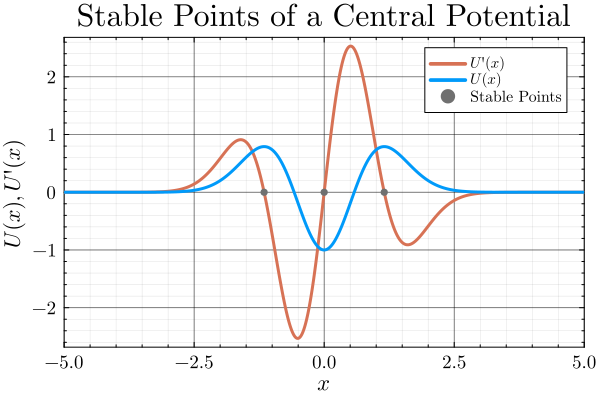

In [39]:
theme(:dao)

plot(x_vals, dU.(x_vals),
    line = (3, :solid),
    label=L"$U'(x)$"
    )
plot!(x_vals, U.(x_vals), 
    label=L"$U(x)$",
    line = (3, :solid),
    title = "Stable Points of a Central Potential",
    xlabel = L"$x$",
    ylabel = L"$U(x), U'(x)$",
    legend = :best,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15,
    right_margin = 2 * Plots.mm,
    xlims = domain
    )

scatter!([x1, x2, x3], [y1, y2, y3], marker=:circle, markersize=4, label="Critical Points")

savefig("Elster_Potato1.pdf")

In [40]:
println("Critical points occur at:")
println(x1)
println(round(x2, digits=5))
println(round(x3, digits=5))

Stable points occur at:
0.0
-1.1547
1.1547


In [41]:
function bisection(f::Function, interval::Vector, tol::Float64)
    a, b = interval
    iter = 0
    
    while (b - a) / 2 > tol  # Stop when the interval size is within tolerance
        c = (a + b) / 2      # Midpoint
        if f(a) * f(c) < 0   # If signs are different:
            b = c            # root is in the [a, c] interval
        else                 # else:
            a = c            # root is in the [c, b] interval
        end
        iter += 1
    end
    
    c = (a + b) / 2  # Final midpoint approximation
    return c, iter
end

bisection (generic function with 1 method)

Say we guess a critical point is in the interval $[0.5, 2.5]$, then we can apply the bisection algorithm to find this root (where $dU/dx = 0$). And after 14 iterations (due to an error tolerance of 1e-4 which is our stopping condition), we get the following:

In [42]:
x3_approx = bisection(dU, [0.5, 2.5], 1e-4)

(1.15472412109375, 14)

In [43]:
# Comparison

println("Actual root: ", x3)
println("Approximate Root: ", x3_approx[1])

Actual root: 1.1547005383792515
Approximate Root: 1.15472412109375


And we see that, up to the tolerance specified, our results from the bisection algorithm do indeed agree with the exact solution (using numerical differentation to find $dU/dx$). Hooray!